In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import networkx as nx
import pickle
import sys
sys.path.insert(1, '../../')
from utils import *

In [2]:
plt.rcParams.update({'font.size': 13})

In [ ]:
import os
folder = '../figs'
if not os.path.exists(folder):
    os.makedirs(folder)

## Functions:

In [3]:
#dataset = 'hospital'
dataset = 'high_school'
#dataset = 'conference'
#dataset = 'workplace'
#dataset = 'pr_school'

In [4]:
weighted = True

In [5]:
edgelist_name = '../../data/pairwise/' + dataset + '_strength_edgelist_pairwise_sorted_norm.pkl'
with open(edgelist_name, 'rb') as f:
    edgelist = pickle.load(f)

nodes_list = np.unique(list(edgelist.keys()))

In [6]:
betaT = 0

In [7]:
nb_nodes = len(nodes_list)
#seed_size = int(round(nb_nodes/10))
seed_size = 1

In [8]:
def similarity(mu, beta_range, a_inf, a_sup):

    # load weights
    C_list = []
    CL_list = []
    for beta in beta_range:
        
        filenameL = "results/inf_treeSIR_a_fixed/a_%.2f_%.2f_final/CL_mean_weighted_%s_beta_%.3f_betaT_0.000_mu_%.2f_init_%d.csv"%(a_inf,a_sup,dataset,beta,mu,seed_size)

        C = load_C_mean(filenameL)
        C_list.append(C)
            
        
    # compute similarity
    sim = np.full((len(beta_range),len(beta_range)),0.0)
    for i in range(len(beta_range)-1):
        for j in range(i+1,len(beta_range)):
            sim[i,j] = cos_sim(C_list[i],C_list[j])

    
            
    return sim, C_list

# Comparison matrices

In [9]:
mu = 0.1
betaT = 0
if dataset == 'hospital':
    beta_range = [0.2,0.3,0.4,0.5,0.6]
    R0_range = [1.20,1.53,1.77,2,2.22]
    a_inf = 0.6
    a_sup = 0.7
elif dataset == 'high_school':
    beta_range = [0.7,0.75,0.8,0.85,0.9,0.95,1.0]
    R0_range = [1.55,1.63,1.71,1.79,1.83,1.86,1.89]
    a_inf = 0.6
    a_sup = 0.7
elif dataset == 'workplace':
    beta_range = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    R0_range = [1.26,1.55,1.82,2.06,2.22,2.40,_]
    a_inf = 0.5
    a_sup = 0.6
elif dataset == 'conference':
    beta_range = [0.75,0.85,0.9,1]
    R0_range = [1.46,1.56,1.60,1.74]
    a_inf = 0.6
    a_sup = 0.7
elif dataset == 'pr_school':
    beta_range = [0.15,0.18,0.21,0.24,0.27,0.3,0.33,0.36]
    R0_range = [1.65,1.97,2.11,2.31,2.48,2.68,2.84,3.01]
    a_inf = 0.75
    a_sup = 0.85

In [10]:
if dataset == 'pr_school':
    minValue_dataset = 0.9358202971633636
    maxValue_dataset = 0.9980819653892196
elif dataset == 'hospital':
    minValue_dataset = 0.8191292897877029
    maxValue_dataset = 0.9978018310214777
elif dataset == 'workplace':
    minValue_dataset = 0.6640920326980589
    maxValue_dataset = 0.9812107449339817
elif dataset == 'high_school':
    minValue_dataset = 0.9773412083701526 
    maxValue_dataset = 0.9969046147793836
elif dataset == 'conference':
    minValue_dataset = 0.9686355970282393 
    maxValue_dataset = 0.9967021042518226

In [11]:
S, C_list = similarity(mu, beta_range, a_inf, a_sup)

In [12]:
figname = '../figs/cos_sim_' + dataset + '_mu_%.2f_a_%.2f_%.2f_final'%(mu,a_inf,a_sup)

0.9951777378437762 0.9969046147793836
../figs/cos_sim_high_school_mu_0.10_a_0.60_0.70_final.pdf


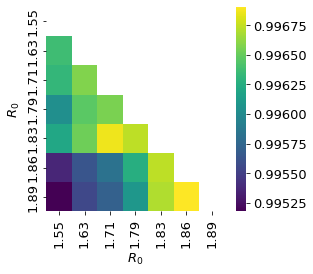

In [13]:
plot_sim(S, mu, R0_range, ax_label='$R_0$', save=True, figname=figname,
         scale='independent',min_scale = minValue_dataset,max_scale = maxValue_dataset)

0.9773412083701526 0.9969046147793836
../figs/cos_sim_high_school_mu_0.10_a_0.60_0.70_final_colorscale.pdf


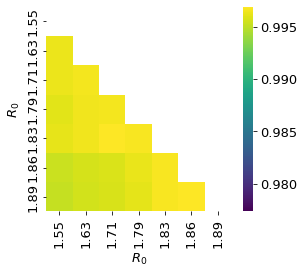

In [14]:
plot_sim(S, mu, R0_range, ax_label='$R_0$', save=True, figname=figname,
         scale='fixed',min_scale = minValue_dataset,max_scale = maxValue_dataset)